In [434]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline



In [435]:
X_inputs = np.array([[1,2],[1,3],[1,4],[1,5],[5,2],[3,1],[2,1],[1,1]])
test_set = [[6,1],[-1, -2],[-2, 3],[3, 2],[3,2], [7,1], [-1, -2],[1,1]]
y = np.array([[0, 0, 0, 0, 1, 1, 1, 0]])
y = np.array([[0, 0, 0, 0, 1, 1, 1, 0]]).reshape(y.shape[1],1)


In [436]:
class LayerDense:
    def __init__(self, n_inputs, n_neuron):
        self.layer_n = None
        self.n_neuron = n_neuron
        self.weights = np.random.randn(n_inputs, n_neuron)
        self.biases = np.zeros((1, n_neuron))
        self.output = None
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases   
    def __repr__(self):
        return "layer: {}th, neurons:{}, weights: {}, biases:{}\n".format(self.layer_n, self.n_neuron, self.weights, self.biases)

In [437]:
# define helper functions

def activate_sigmoid(inputs):
    return 1.0/(1.0+np.exp(-inputs))

def der_sigmoid(inputs):
    return inputs * (1 - inputs)

def activate_ReLU(inputs):
    return np.maximum(0, inputs)

def der_active_ReLU(inputs):
    inputs[inputs > 0 ] = 1
    inputs[inputs <= 0 ] = 0
    return inputs

def loss_function_mse(predict, target):
    return np.mean((predict - target)**2)
def der_loss_function_mse(predict, target):
    return predict - target


In [438]:
# initial network model
def build_network(network_list=[2,1,2]):
    
    # network_list = [2,1,2], 2, inputs, 1, hidden1-1, output, 2
    network = []
    if not isinstance(network_list, list):
        return None
    
    # build network
    for i in range(len(network_list)-1 ):
        layer = LayerDense(network_list[i],network_list[i+1])
        layer.layer_n = i+1
        network.append(layer)
    
    return network
        


In [439]:
# Build network with Weights
networks = [2,4,2,1]
network = build_network(networks)

network


[layer: 1th, neurons:4, weights: [[-0.12242003 -0.08985308 -0.55628707  0.46057309]
  [-1.56935643  0.47515891  1.07711821  0.6684586 ]], biases:[[0. 0. 0. 0.]],
 layer: 2th, neurons:2, weights: [[ 1.40338928  1.06596159]
  [-1.91902697 -1.60496406]
  [ 2.09128109  1.13869029]
  [ 1.48799034  0.38014224]], biases:[[0. 0.]],
 layer: 3th, neurons:1, weights: [[2.19830854]
  [1.47979871]], biases:[[0.]]]

In [440]:
# forward propagation over network

# layer1 = network[0]
# z1 = np.dot(X_inputs, layer1.weights) + layer1.biases
# a = activate_sigmoid(z1)

# output = [a]
output = [X_inputs]
for layer in range(len(network)):
#     z = np.dot(output[-1], network[layer].weights) + network[layer].biases
    network[layer].forward(output[-1])
    z = network[layer].output
    a = activate_sigmoid(z)
#     print(output)
    output.append(a)

In [441]:
output[-1]

array([[0.93536619],
       [0.93632828],
       [0.93517063],
       [0.93339357],
       [0.90694033],
       [0.91830126],
       [0.92604844],
       [0.93210535]])

In [442]:
[ print("shapes", o.shape) for o in output ]
# X =  np.round(np.random.randn(20,2),3) 

shapes (8, 2)
shapes (8, 4)
shapes (8, 2)
shapes (8, 1)


[None, None, None, None]

In [443]:
# back-propagation for last layer
lr = 0.01
error = output[-1] - y

# delta = output.T.dot(error)
network[-1].biases = network[-1].biases - error.mean() * lr
network[-1].weights = network[-1].weights - (output[-1].T.dot(error)) * lr


In [444]:
network

[layer: 1th, neurons:4, weights: [[-0.12242003 -0.08985308 -0.55628707  0.46057309]
  [-1.56935643  0.47515891  1.07711821  0.6684586 ]], biases:[[0. 0. 0. 0.]],
 layer: 2th, neurons:2, weights: [[ 1.40338928  1.06596159]
  [-1.91902697 -1.60496406]
  [ 2.09128109  1.13869029]
  [ 1.48799034  0.38014224]], biases:[[0. 0.]],
 layer: 3th, neurons:1, weights: [[2.15692551]
  [1.43841569]], biases:[[-0.00552957]]]

In [445]:
# Back-propagation
lr = 0.05
# back = list(range(len(output)-1))
# back.reverse()
# back-propagation for rest of layers and updates weights and biases
delta = []
back = list(range(len(output)-1))
back.reverse()

for i in back:
    # get one of the output of next layer
    next_a = output[i+1]
#     print(next_a)
    if i == back[0]:
        print("first run delta",delta)
        # calculate the delta between current and next layer
        # error * der_sigmoid(previous_output), gredicent here
        print("next a", next_a)
        x = (next_a - y) * der_sigmoid(next_a)
        delta.append(x)
#         print("delta current is: -->{}\n".format(delta))
    else:
        # delta = last delta.T.dot(last weights)*der_sigmoid_with_output
        print("currnet delta is: -->", delta[-1])
        print("previous weights is: -->", previous_W)

        x = delta[-1] @ previous_W * der_sigmoid(next_a)
        delta.append(x)
    
    # store tmp W for next layer previous compute
    previous_W = network[i].weights.transpose()
    
    # gradicent descent for update weights
    network[i].biases = network[i].biases - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    print("output Matrix shape {}, delta Matrix shape {}".format(output[i].shape, delta[-1].shape))
    print("===> output.matrix{} dot delta[-1] {}.matrix".format(output[i], delta[-1]))
    network[i].weights = network[i].weights - output[i].T @ delta[-1] * lr
    
    print("===> network {} layer, weights => {} bias =>{} updated".format(i, network[i].weights, network[i].biases))
    
    
    


first run delta []
next a [[0.93536619]
 [0.93632828]
 [0.93517063]
 [0.93339357]
 [0.90694033]
 [0.91830126]
 [0.92604844]
 [0.93210535]]
output Matrix shape (8, 2), delta Matrix shape (8, 1)
===> output.matrix[[0.8480079  0.54603202]
 [0.86052693 0.53826371]
 [0.86083779 0.52478973]
 [0.85677952 0.51125875]
 [0.7340403  0.44816145]
 [0.7653693  0.4980198 ]
 [0.79566119 0.5260225 ]
 [0.8194369  0.55285456]] dot delta[-1] [[ 0.05654876]
 [ 0.05582167]
 [ 0.05669615]
 [ 0.05802909]
 [-0.0078542 ]
 [-0.00612937]
 [-0.00506441]
 [ 0.05898826]].matrix
===> network 2 layer, weights => [[2.14550725]
 [1.43122963]] bias =>[[-0.00719854]] updated
currnet delta is: --> [[ 0.05654876]
 [ 0.05582167]
 [ 0.05669615]
 [ 0.05802909]
 [-0.0078542 ]
 [-0.00612937]
 [-0.00506441]
 [ 0.05898826]]
previous weights is: --> [[2.15692551 1.43841569]]
output Matrix shape (8, 4), delta Matrix shape (8, 2)
===> output.matrix[[3.69288965e-02 7.02757742e-01 8.31731583e-01 8.57843155e-01]
 [7.91939670e-03 7.91769

In [446]:
pprint(network)

[layer: 1th, neurons:4, weights: [[-0.12264846 -0.08832712 -0.5566845   0.46000513]
 [-1.56982337  0.48113799  1.07515468  0.66709295]], biases:[[-4.39833348e-05  2.89056222e-04 -1.37429479e-04 -8.31755183e-05]]
,
 layer: 2th, neurons:2, weights: [[ 1.40323784  1.0657811 ]
 [-1.92181894 -1.60870752]
 [ 2.08802678  1.1343647 ]
 [ 1.48482572  0.37587982]], biases:[[-0.00044718 -0.00059672]]
,
 layer: 3th, neurons:1, weights: [[2.14550725]
 [1.43122963]], biases:[[-0.00719854]]
]


In [447]:
print('MSE: ' + str(loss_function_mse(output[-1],y)))
print('Estimation: ' + str(output[-1]) )

MSE: 0.5483765272684813
Estimation: [[0.93536619]
 [0.93632828]
 [0.93517063]
 [0.93339357]
 [0.90694033]
 [0.91830126]
 [0.92604844]
 [0.93210535]]


## Put all together

In [472]:
# traversing in the model

def network_propagation (X, y, network, lr=0.01):
    
    # forward propagation
    output = [X] # put input as the fist layer output
    for layer in range(len(network)):
        network[layer].forward(output[-1])
        z = network[layer].output
        a = activate_sigmoid(z)
        output.append(a)
    
    # backforward propagation for output and errors
    delta = []
    back = list(range(len(output)-1))
    back.reverse()

    for layer in back:
        # get one of the output of next layer
        next_a = output[layer+1]
        if layer == back[0]:
            x = (next_a - y) * der_sigmoid(next_a)
            delta.append(x)
        else:
            x = delta[-1] @ previous_W * der_sigmoid(next_a)
            delta.append(x)
        # store tmp W for next layer previous compute
        previous_W = network[layer].weights.transpose()

        # gradicent descent for update weights
        network[layer].biases = network[layer].biases - np.mean(delta[-1], axis = 0, keepdims = True) * lr
        network[layer].weights = network[layer].weights - output[layer].T @ delta[-1] * lr
#       print("===> network {} layer, weights => {} bias =>{} updated".format(i, network[i].weights, network[i].biases))
    
    return output[-1], delta
        
        
        

In [479]:
def train_model(X, y, network, lr=0.01, epoches=100):
    errors = []
    predictions = []
    delta_history = []
    for i in range(epoches):
        prediction, delta = network_propagation(X, y, network, lr=lr)
        delta_history.append(delta)
        predictions.append(prediction)
        error = loss_function_mse(prediction, y)
        print("===>> epoch: {},  error: {:.4f}, accuracy {:.4f} %".format(i , error, (1- error)*100))
        errors.append(error)
        
    return errors, predictions, delta_history


In [480]:
network_propagation(X_inputs, y, network)

(array([[0.6596134 ],
        [0.65570321],
        [0.65156763],
        [0.64859885],
        [0.68290276],
        [0.68239106],
        [0.67637536],
        [0.66023   ]]), [array([[ 0.14809875],
         [ 0.14802927],
         [ 0.14792361],
         [ 0.1478276 ],
         [-0.06866632],
         [-0.0688365 ],
         [-0.07083876],
         [ 0.14810698]]), array([[ 0.0169465 ,  0.05309586],
         [ 0.01628604,  0.05282026],
         [ 0.01576037,  0.05225811],
         [ 0.01538843,  0.05180879],
         [-0.00839023, -0.02631156],
         [-0.00839655, -0.02635113],
         [-0.00857285, -0.02663253],
         [ 0.01770895,  0.05222605]]), array([[-1.42820318e-02, -3.26189535e-03,  6.64364117e-04,
          -9.77917321e-03],
         [-1.29166372e-02, -1.31091202e-03,  2.88898915e-04,
          -9.43329509e-03],
         [-1.03287408e-02, -5.07316294e-04,  1.22776851e-04,
          -8.69563028e-03],
         [-7.51013567e-03, -1.94183235e-04,  5.18855077e-05,
       

## Train model 

In [481]:

# Define data set and test set
X = np.array([[1,2],[1,3],[1,4],[1,5],[5,2],[3,1],[2,1],[1,1]])
y = np.array([[0, 0, 0, 0, 1, 1, 1, 0]])
y = np.array([[0, 0, 0, 0, 1, 1, 1, 0]]).reshape(y.shape[1],1)


test_set = [[6,1],[-1, -2],[-2, 3],[3, 2],[3,2], [7,1], [-2,-2],[1,1]]
y_test_set = np.array([[1, 1, 0, 1, 1, 1, 0, 0]])
y_test_set = np.array([[1, 1, 0, 1, 1, 1, 0, 0]]).reshape(y_test_set.shape[1],1)


# Build network with hyperparameters
learning_rate = 0.5
epoches = 500
networks = [2,4,2,1] # train with three layers with neuron 4,2,1


In [482]:

network = build_network(networks)

errors, predictions, delta = train_model(X, y, network, lr=learning_rate, epoches=epoches)



===>> epoch: 0,  error: 0.2266, accuracy 77.3381 %
===>> epoch: 1,  error: 0.2259, accuracy 77.4103 %
===>> epoch: 2,  error: 0.2251, accuracy 77.4889 %
===>> epoch: 3,  error: 0.2242, accuracy 77.5760 %
===>> epoch: 4,  error: 0.2233, accuracy 77.6736 %
===>> epoch: 5,  error: 0.2222, accuracy 77.7844 %
===>> epoch: 6,  error: 0.2209, accuracy 77.9116 %
===>> epoch: 7,  error: 0.2194, accuracy 78.0594 %
===>> epoch: 8,  error: 0.2177, accuracy 78.2326 %
===>> epoch: 9,  error: 0.2156, accuracy 78.4360 %
===>> epoch: 10,  error: 0.2133, accuracy 78.6738 %
===>> epoch: 11,  error: 0.2105, accuracy 78.9467 %
===>> epoch: 12,  error: 0.2075, accuracy 79.2500 %
===>> epoch: 13,  error: 0.2043, accuracy 79.5734 %
===>> epoch: 14,  error: 0.2010, accuracy 79.9043 %
===>> epoch: 15,  error: 0.1977, accuracy 80.2324 %
===>> epoch: 16,  error: 0.1945, accuracy 80.5519 %
===>> epoch: 17,  error: 0.1914, accuracy 80.8611 %
===>> epoch: 18,  error: 0.1884, accuracy 81.1601 %
===>> epoch: 19,  erro

===>> epoch: 374,  error: 0.0026, accuracy 99.7395 %
===>> epoch: 375,  error: 0.0026, accuracy 99.7407 %
===>> epoch: 376,  error: 0.0026, accuracy 99.7420 %
===>> epoch: 377,  error: 0.0026, accuracy 99.7432 %
===>> epoch: 378,  error: 0.0026, accuracy 99.7444 %
===>> epoch: 379,  error: 0.0025, accuracy 99.7456 %
===>> epoch: 380,  error: 0.0025, accuracy 99.7468 %
===>> epoch: 381,  error: 0.0025, accuracy 99.7480 %
===>> epoch: 382,  error: 0.0025, accuracy 99.7492 %
===>> epoch: 383,  error: 0.0025, accuracy 99.7503 %
===>> epoch: 384,  error: 0.0025, accuracy 99.7515 %
===>> epoch: 385,  error: 0.0025, accuracy 99.7526 %
===>> epoch: 386,  error: 0.0025, accuracy 99.7538 %
===>> epoch: 387,  error: 0.0025, accuracy 99.7549 %
===>> epoch: 388,  error: 0.0024, accuracy 99.7560 %
===>> epoch: 389,  error: 0.0024, accuracy 99.7571 %
===>> epoch: 390,  error: 0.0024, accuracy 99.7582 %
===>> epoch: 391,  error: 0.0024, accuracy 99.7593 %
===>> epoch: 392,  error: 0.0024, accuracy 99.

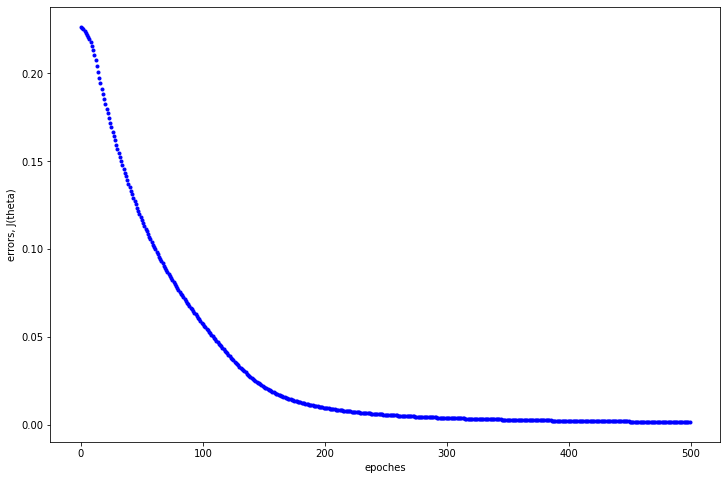

In [490]:
## plot figure to check errors

# plt.plot(range(epoches), errors, color="green", marker='o')

# plt.plot(range(epoches), errors, marker='o',color='blue', markersize=3, linestyle='dashed',linewidth=1)
# plt.xlabel("epoches")
# plt.ylabel("errors, J(theta)")
# plt.show()

fig,ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("epoches")
ax.set_ylabel("errors, J(theta)")
_ = ax.plot(range(epoches), errors, 'b.')


In [491]:

def predict(test_set, y, network):
    
    output = [test_set]
#     predict = []
    for layer in range(len(network)):
        network[layer].forward(output[-1])
        z = network[layer].output
        a = activate_sigmoid(z)
        output.append(a)
    
    # optimize of the output
    output[-1][output[-1] > 0.5] = 1
    output[-1][output[-1] <= 0.5] = 0   
#     predict = output
    
#     for i in range(len(output[-1])):
#         if output[-1][i] > 0.5:
#             predict.append(1)
#         else:
#             predict.append(0)
#     predict.append(1) for i in range(len(output[-1])) if output[-1][i] > 0.5 else predict.append(0)

    error = loss_function_mse(output[-1], y)
    return output[-1], error

# output, predict, error = predict(test_set, y_set, network)
output, error = predict(test_set, y_test_set, network)   

In [492]:
for i in range(output.shape[0]):
    print("expected:     {} \t Got ==> predicted(yhat): {} \n".format(y_test_set[i], np.round(np.mean(output[i]),2)))
#     print("accuracy: {}".format(max(errors)))

expected:     [1] 	 Got ==> predicted(yhat): 1.0 

expected:     [1] 	 Got ==> predicted(yhat): 1.0 

expected:     [0] 	 Got ==> predicted(yhat): 0.0 

expected:     [1] 	 Got ==> predicted(yhat): 1.0 

expected:     [1] 	 Got ==> predicted(yhat): 1.0 

expected:     [1] 	 Got ==> predicted(yhat): 1.0 

expected:     [0] 	 Got ==> predicted(yhat): 1.0 

expected:     [0] 	 Got ==> predicted(yhat): 0.0 

